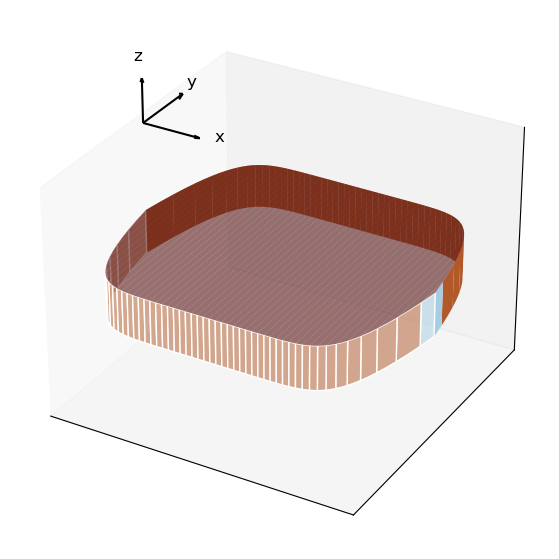

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Paramètres globaux
N = 100
x = np.linspace(0, 1, N)

# Fonction de forme Caplier
def Caplier(x):
    x0 = 1/2
    return (1 - (2*(x - x0))**8)

# Création de la figure 3D
fig = plt.figure(figsize=(10, 7))
ax3d = fig.add_subplot(111, projection='3d')

# Génération des données pour le bateau Caplier
X = np.linspace(0, 1, N)
Z = np.array([0.4, 0.6])  # Plans z = 0 et z = 1
X, Z = np.meshgrid(X, Z)

Ypos = Caplier(X)
Yneg = -Caplier(X)

# Tracé du bateau Caplier en 3D
ax3d.plot_surface(X, Ypos, Z, cmap='Paired', edgecolor='none')
ax3d.plot_surface(X, Yneg, Z, cmap='Paired', edgecolor='white', alpha=0.5)
X0, Z0 = np.meshgrid(np.linspace(0, 1, N), np.array([0.6]))  # Plan Z = 0.6 pour le canal
Yfill = np.vstack([Ypos[0], Yneg[0]])  # Remplissage entre Ypos et Yneg
ax3d.plot_surface(X0, Yfill, Z0, color='brown', alpha=0.6, edgecolor='none')

# Ajout des flèches des axes et étiquettes
ax3d.quiver(0, 0, 1, 0.2, 0, 0, color='black', arrow_length_ratio=0.1)  # Axe x
ax3d.quiver(0, 0, 1, 0, 0.5, 0, color='black', arrow_length_ratio=0.1)  # Axe y
ax3d.quiver(0, 0, 1, 0, 0, 0.2, color='black', arrow_length_ratio=0.1)  # Axe z

# Ajout des labels des axes
ax3d.text(.25, 0, 1, 'x', color='black', fontsize=12)
ax3d.text(0, .55, 1.02, 'y', color='black', fontsize=12)
ax3d.text(0, -0.1, 1.3, 'z', color='black', fontsize=12)

# Réglages des axes
ax3d.set_xticks([])
ax3d.set_yticks([])
ax3d.set_zticks([])
ax3d.set_xlim(0, 1)
ax3d.set_zlim(0, 1)

# Affichage
plt.show()


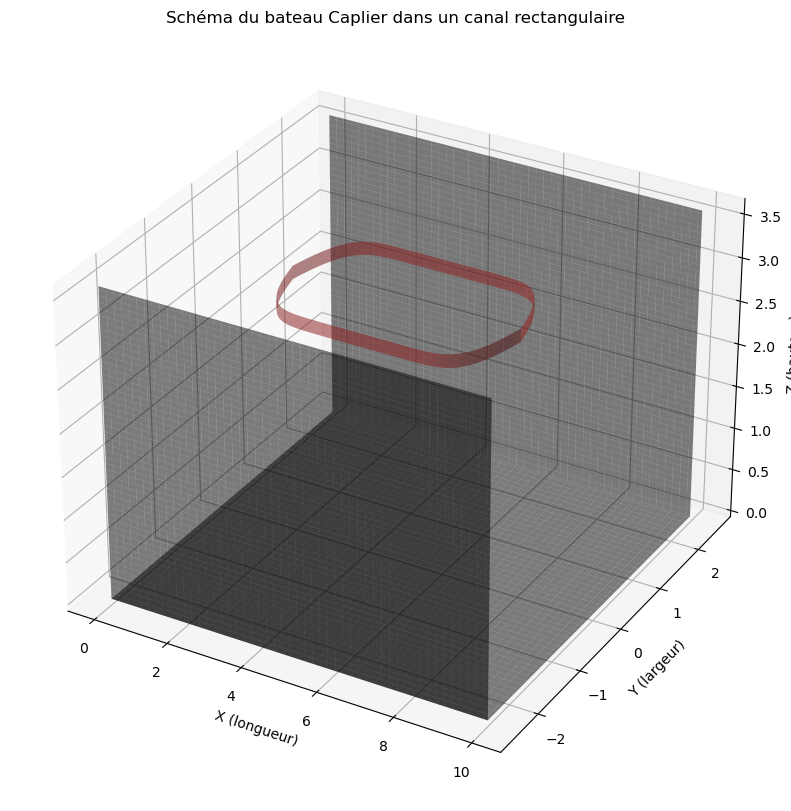

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Paramètres du bateau et du canal
Lc = 10  # Longueur du bateau
W = 5   # Largeur du canal
h = 3   # Hauteur d'eau
B = 2   # Largeur du bateau
T = 0.1 # Hauteur du bateau
L = 6 # Longueur du bateau


# Paramètres pour les bords
N = 100
X_walls = np.linspace(0, Lc, N)
Z_walls = np.linspace(0, 1.2 * h, N)
X_canal, Z_walls = np.meshgrid(X_walls, Z_walls)

# Création de la figure 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Tracé du bateau
x_bateau = np.linspace(0, L, 100)
z_bateau = np.linspace(h-T, h + 0.5 * T, 100)
X_bateau, Z_bateau = np.meshgrid(x_bateau, z_bateau)
Y_bateau_pos = (B / 2) * (1 - (2 * (X_bateau - L / 2) / L) ** 8)  # Forme Caplier
Y_bateau_neg = -Y_bateau_pos

ax.plot_surface(X_bateau+ (Lc-L)/2, Y_bateau_pos, Z_bateau, color='brown', alpha=0.7)
ax.plot_surface(X_bateau + (Lc-L)/2, Y_bateau_neg, Z_bateau, color='brown', alpha=0.7)
X0, Z0 = np.meshgrid(np.linspace(0, L, N), np.array([h+0.5*T]))  
Yfill = np.vstack([Y_bateau_pos[0], Y_bateau_neg[0]])  # Remplissage entre Ypos et Yneg
ax3d.plot_surface(X0, Yfill, Z0, color='brown', alpha=0.6, edgecolor='none')



# Bords en Y = -1 et Y = 1
Y_canal_bottom = -W / 2 * np.ones_like(X_canal)
Y_canal_top = W / 2 * np.ones_like(X_canal)
ax.plot_surface(X_canal, Y_canal_bottom, Z_walls, color='black', alpha=0.5)  # Bord en Y = -W/2
ax.plot_surface(X_canal, Y_canal_top, Z_walls, color='black', alpha=0.5)  # Bord en Y = W/2

# Tracé du fond du canal
X_canal, Y_canal = np.meshgrid(X_walls, np.linspace(-W / 2, W / 2, N))
Z_canal = np.zeros_like(X_canal)
ax.plot_surface(X_canal, Y_canal, Z_canal, color='black', alpha=0.5)

# Réglages de l'affichage
ax.set_xlabel('X (longueur)')
ax.set_ylabel('Y (largeur)')
ax.set_zlabel('Z (hauteur)')
ax.set_title('Schéma du bateau Caplier dans un canal rectangulaire')

plt.show()


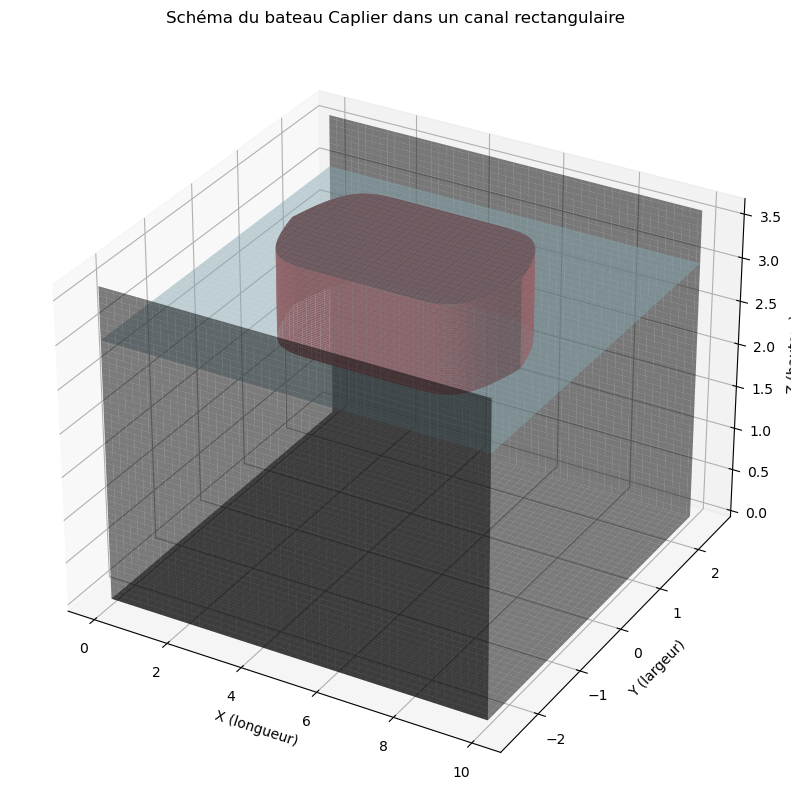

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Paramètres du bateau et du canal
Lc = 10  # Longueur du canal
W = 5    # Largeur du canal
h = 3    # Hauteur d'eau
B = 2    # Largeur du bateau
T = 0.4  # Hauteur du bateau
L = 6    # Longueur du bateau

# Paramètres pour les bords
N = 100
X_walls = np.linspace(0, Lc, N)
Y_walls = np.linspace(-W / 2, W / 2, N)
Z_walls = np.linspace(0, 1.2 * h, N)

X_canal, Z_walls = np.meshgrid(X_walls, Z_walls)


Z_pont = h + 1.5 * T


# Création de la figure 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Tracé du bateau
x_bateau = np.linspace(0, L, 100)
z_bateau = np.linspace(h - T, Z_pont, 100)
X_bateau, Z_bateau = np.meshgrid(x_bateau, z_bateau)
Y_bateau_pos = (B / 2) * (1 - (2 * (X_bateau - L / 2) / L) ** 8)  # Forme Caplier
Y_bateau_neg = -Y_bateau_pos

ax.plot_surface(X_bateau + (Lc - L) / 2, Y_bateau_pos, Z_bateau, color='brown', alpha=1, zorder = 2)
ax.plot_surface(X_bateau + (Lc - L) / 2, Y_bateau_neg, Z_bateau, color='brown', alpha=1, zorder = 2)



X0, _ = np.meshgrid(np.linspace((Lc - L) / 2, (Lc + L) / 2, N), np.array([Z_pont]))  # 
Y_fill = np.vstack([Y_bateau_pos[0], Y_bateau_neg[0]])  # Remplissage entre Ypos et Yneg
ax.plot_surface(X0, Y_fill, np.full_like(X0, Z_pont), color='brown', alpha=1, edgecolor='none')



# Bords en Y = -W / 2 et Y = W / 2
Y_canal_bottom = -W / 2 * np.ones_like(X_canal)
Y_canal_top = W / 2 * np.ones_like(X_canal)
ax.plot_surface(X_canal, Y_canal_bottom, Z_walls, color='black', alpha=0.5)  # Bord en Y = -W / 2
ax.plot_surface(X_canal, Y_canal_top, Z_walls, color='black', alpha=0.5)  # Bord en Y = W / 2

# Tracé du fond du canal
X_canal, Y_canal = np.meshgrid(X_walls, Y_walls)
Z_canal = np.zeros_like(X_canal)
ax.plot_surface(X_canal, Y_canal, Z_canal, color='black', alpha=0.5)

# Tracé de l'eau
X_eau, Y_eau = np.meshgrid(X_walls, Y_walls)
Z_eau = np.full_like(X_eau, h)  # Niveau de l'eau
ax.plot_surface(X_eau, Y_eau, Z_eau, color='lightblue', alpha=0.5, zorder =-1)

# Réglages de l'affichage
ax.set_xlabel('X (longueur)')
ax.set_ylabel('Y (largeur)')
ax.set_zlabel('Z (hauteur)')
ax.set_title('Schéma du bateau Caplier dans un canal rectangulaire')

plt.show()


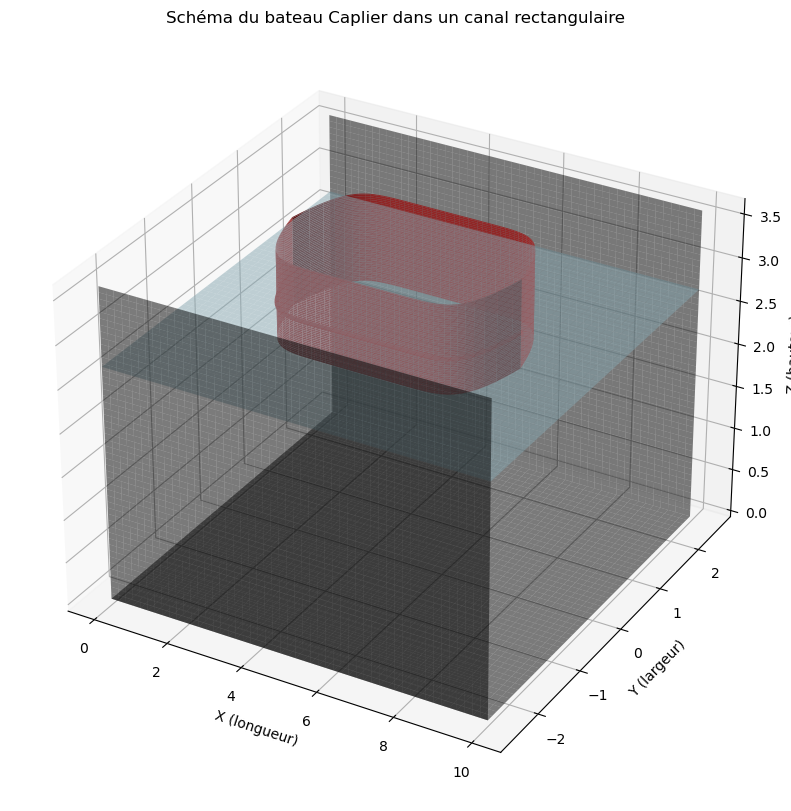

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Paramètres du bateau et du canal
Lc = 10  # Longueur du canal
W = 5    # Largeur du canal
h = 3    # Hauteur d'eau
B = 2    # Largeur du bateau
T = 0.4  # Hauteur du bateau
L = 6    # Longueur du bateau

# Paramètres pour les bords
N = 1000
X_walls = np.linspace(0, Lc, N)
Y_walls = np.linspace(-W / 2, W / 2, N)
Z_walls = np.linspace(0, 1.2 * h, N)

X_canal, Z_walls = np.meshgrid(X_walls, Z_walls)

Z_pont = h + 1.5 * T

# Création de la figure 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Tracé du bateau
x_bateau = np.linspace(0, L, 100)
z_bateau = np.linspace(h - T, Z_pont, 100)
X_bateau, Z_bateau = np.meshgrid(x_bateau, z_bateau)
Y_bateau_pos = (B / 2) * (1 - (2 * (X_bateau - L / 2) / L) ** 8)  # Forme Caplier
Y_bateau_neg = -Y_bateau_pos

ax.plot_surface(X_bateau + (Lc - L) / 2, Y_bateau_pos, Z_bateau, color='brown', alpha=1, zorder=2)
ax.plot_surface(X_bateau + (Lc - L) / 2, Y_bateau_neg, Z_bateau, color='brown', alpha=1, zorder=2)



# Bords en Y = -W / 2 et Y = W / 2
Y_canal_bottom = -W / 2 * np.ones_like(X_canal)
Y_canal_top = W / 2 * np.ones_like(X_canal)
ax.plot_surface(X_canal, Y_canal_bottom, Z_walls, color='black', alpha=0.5)  # Bord en Y = -W / 2
ax.plot_surface(X_canal, Y_canal_top, Z_walls, color='black', alpha=0.5)  # Bord en Y = W / 2

# Tracé du fond du canal
X_canal, Y_canal = np.meshgrid(X_walls, Y_walls)
Z_canal = np.zeros_like(X_canal)
ax.plot_surface(X_canal, Y_canal, Z_canal, color='black', alpha=0.5)

# Tracé de l'eau
X_eau, Y_eau = np.meshgrid(X_walls, Y_walls)
Z_eau = np.full_like(X_eau, 0.9*h)  # Niveau de l'eau
ax.plot_surface(X_eau, Y_eau, Z_eau, color='lightblue', alpha=0.5, zorder=1)

x_line = np.linspace((Lc - L) / 2, (Lc + L) / 2, 100)
z_line = np.full_like(x_line, h)
ax.plot(x_line, Y_bateau_neg[0], z_line, color='brown', linewidth=3, zorder = 5)



# Réglages de l'affichage
ax.set_xlabel('X (longueur)')
ax.set_ylabel('Y (largeur)')
ax.set_zlabel('Z (hauteur)')
ax.set_title('Schéma du bateau Caplier dans un canal rectangulaire')

plt.show()
